In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [101]:
data1=pd.read_csv("Unemployment in India.csv")
data2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

#### Overview of Data1 

In [102]:
data1

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [104]:
data1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [105]:
data1=data1.dropna()

In [106]:
data1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [107]:
data1.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000

In [108]:
data1.columns=data1.columns.str.strip()

In [109]:
data1.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [110]:
data1.rename(columns={
    'Region': 'Region',
    'Date': 'Date',
    'Frequency': 'Freq',
    'Estimated Unemployment Rate (%)': 'Unemp Rate (%)',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Part Rate (%)',
    'Area': 'Area'
}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\1088274395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={


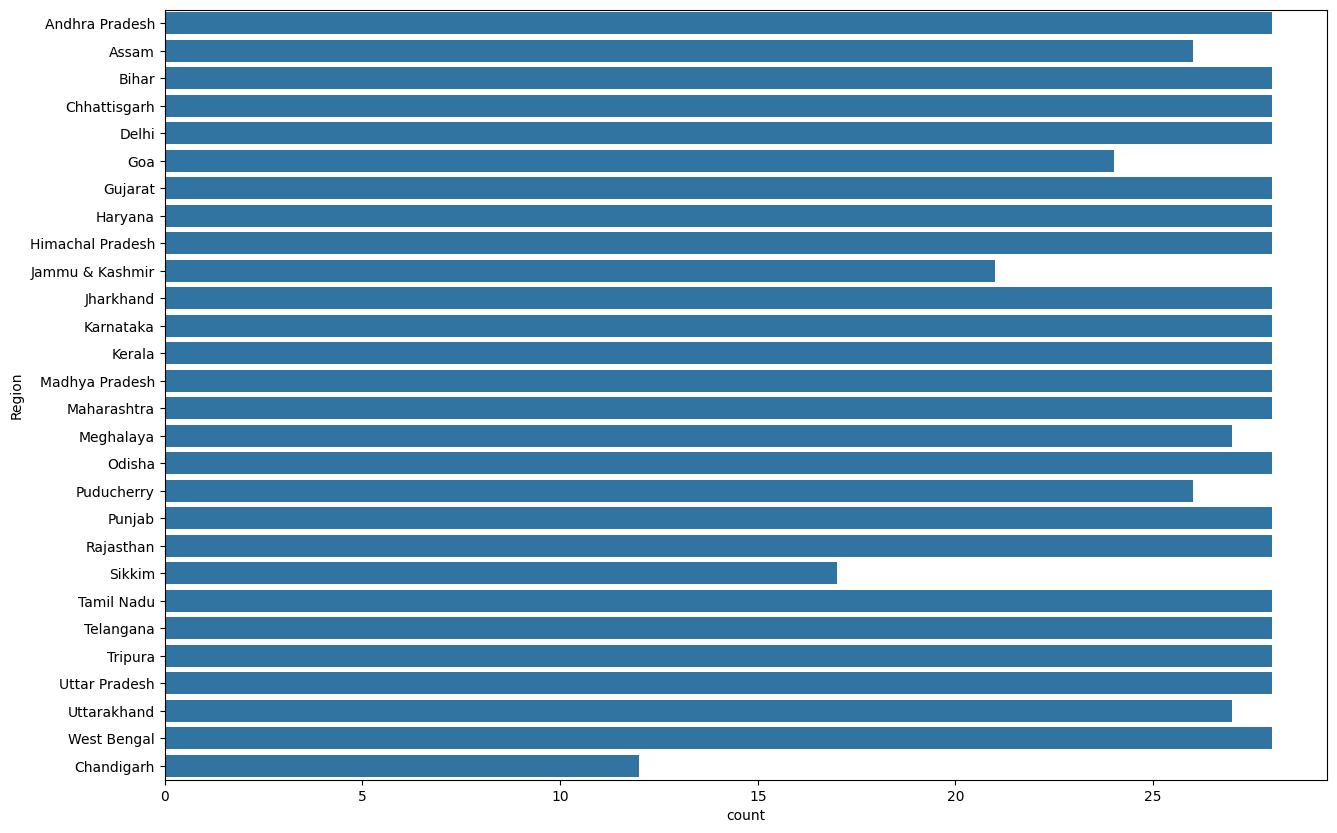

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(y="Region",data=data1)
plt.show()

In [112]:
avg_unemployment_rate=data1.groupby('Region')['Unemp Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

high employment : Tripura
high employment rate : 28.350357142857142
low employment : Meghalaya
low employment rate : 4.7988888888888885


In [113]:
avg_unemployment_rate

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Unemp Rate (%), dtype: float64

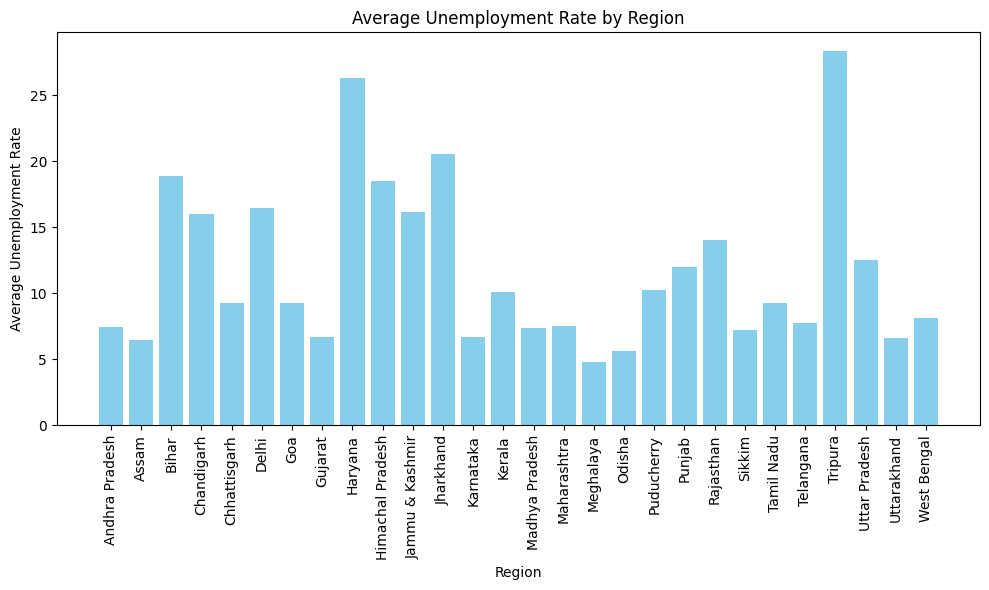

In [114]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values
plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In this bar plot we can see that regions like Tripura and Haryana have the highest unemployement rate where as Meghalaya and Odisa have the lowest unemployment rate

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\2217426946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Unemp Rate (%)', data=data1, palette="husl")


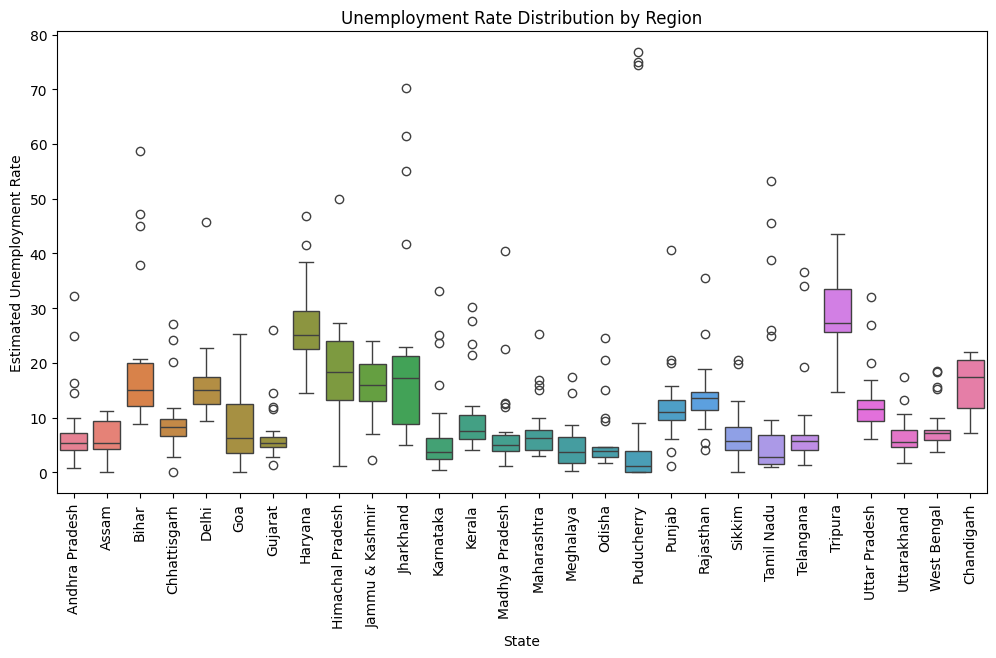

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Unemp Rate (%)', data=data1, palette="husl")
plt.title("Unemployment Rate Distribution by Region")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.show()

### Analysis
The box plot shows how unemployment rates vary across regions. Areas like "Haryana," "Himachal Pradesh," and "Tripura" have wide ranges and many outliers, pointing to greater economic instability. On the other hand, regions such as "Tamil Nadu" and "Uttarakhand" have narrower ranges and fewer outliers, suggesting more stable economic conditions.

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\3029269603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Labour Part Rate (%)', data=data1, palette="husl")


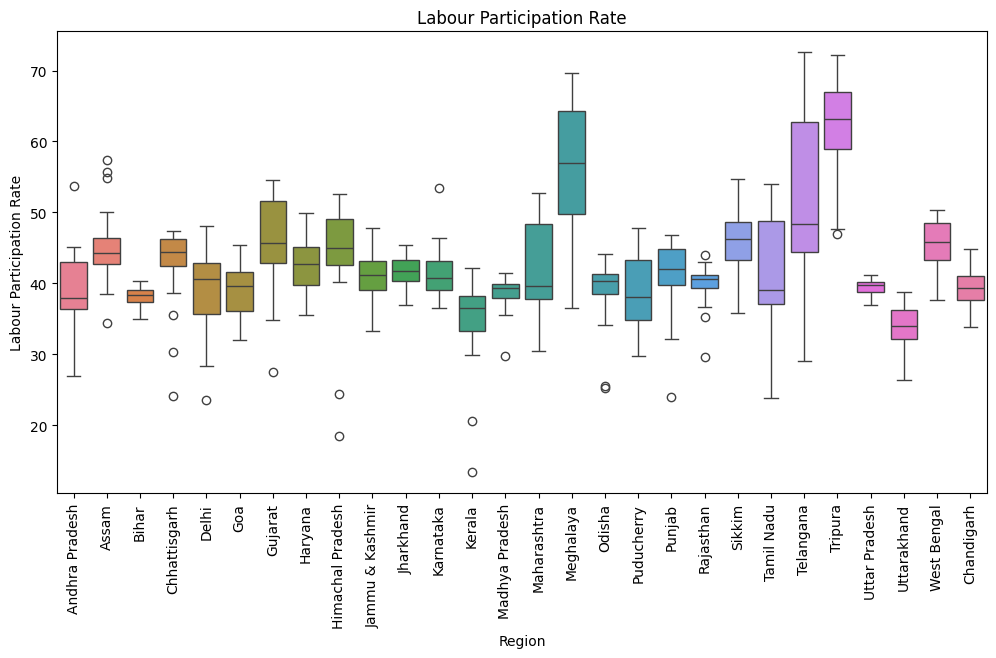

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Labour Part Rate (%)', data=data1, palette="husl")
plt.title("Labour Participation Rate")
plt.xlabel("Region")
plt.ylabel("Labour Participation Rate")
plt.xticks(rotation=90)
plt.show()

### Analysis


The box plot shows how labor participation rates vary across regions in India. Regions such as "Meghalaya," "Tamil Nadu," and "Telangana" have noticeable fluctuations, possibly due to economic instability or policy changes. Meanwhile, "Punjab" and "Haryana" display more stable rates, indicating a steadier labor market and a potentially stronger economic environment

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\930080376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Employed', data=data1, palette="brg")


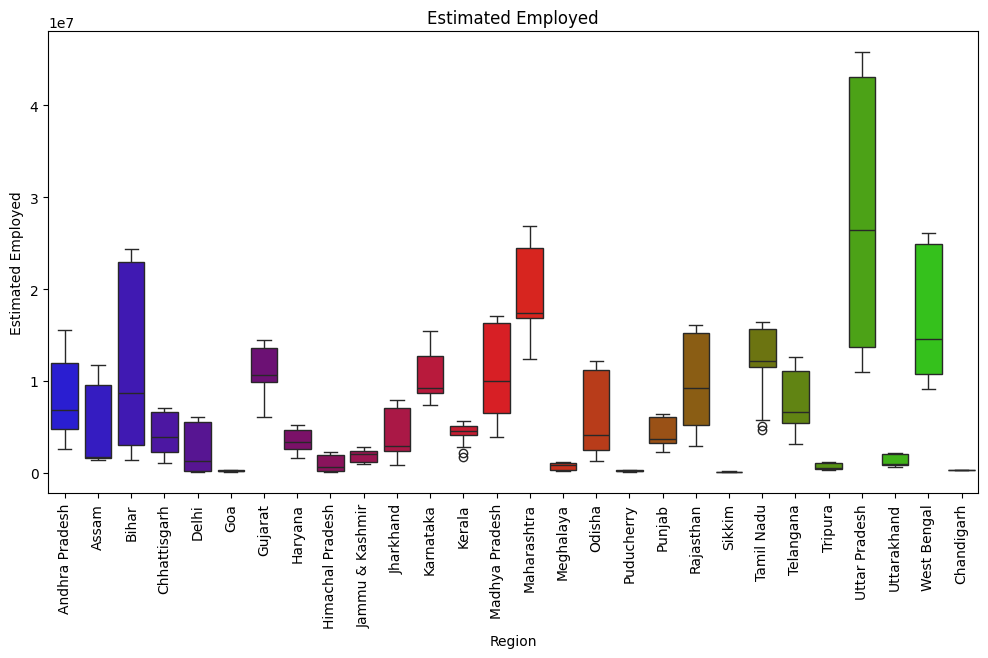

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Employed', data=data1, palette="brg")
plt.title("Estimated Employed")
plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.xticks(rotation=90)
plt.show()

### Analysis: 

The box plot reveals how employment levels vary across different regions in India. Regions like "Uttar Pradesh," "Bihar," and "West Bengal" show a lot of variation, indicating diverse and large labor markets. In contrast, "Goa" and "Puducherry" have more consistent employment levels, suggesting smaller and steadier labor markets. This variation likely reflects differences in population, economic activities, and industry presence.

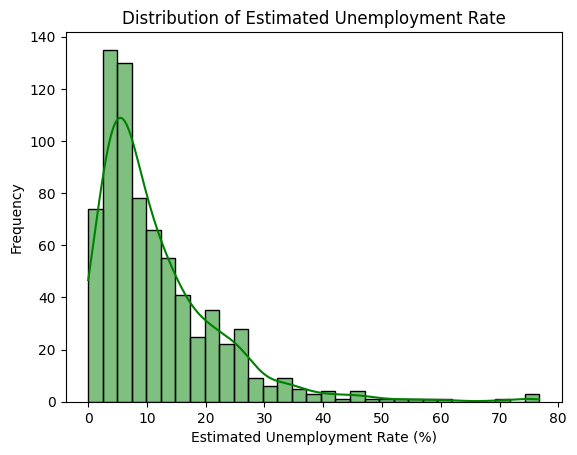

In [118]:
sns.histplot(data=data1, x="Unemp Rate (%)", kde=True, color="green")
plt.title("Distribution of Estimated Unemployment Rate")
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

### Analysis:
The histogram shows that most Indian regions have lower unemployment rates. The KDE curve confirms this with a left-skewed distribution, highlighting that low unemployment is common. However, a few regions have much higher rates, suggesting regional economic challenges or structural problems. While low unemployment is widespread, the higher rates in some areas indicate specific issues that might need targeted economic solutions.

## Labor Participation and Unemployment Rate in India

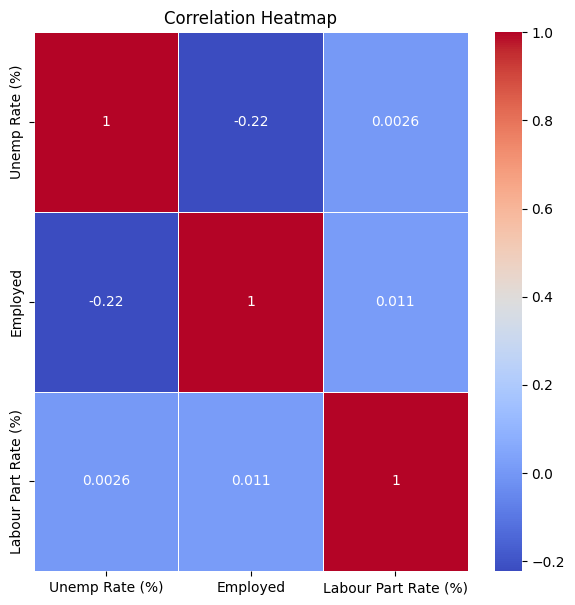

In [119]:
corr = data1[['Unemp Rate (%)', 'Employed', 'Labour Part Rate (%)']].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### analysis:
The heatmap shows:
Negative correlation between unemployment rate and labor participation rate: Higher unemployment is linked to lower labor participation.
Weak positive correlation between employment and labor participation rate: Slight tendency for higher employment to be associated with higher labor participation.
Negative correlation between unemployment rate and employment: Higher unemployment means fewer people are employed.

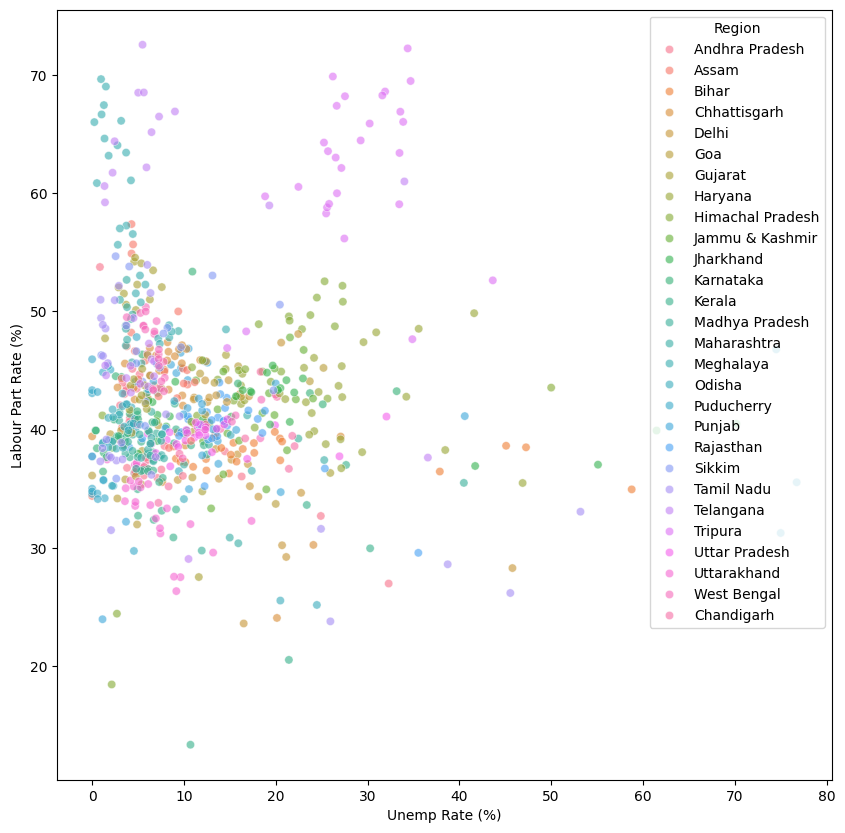

In [120]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data1, x="Unemp Rate (%)", y="Labour Part Rate (%)", hue="Region", sizes=(20, 200), alpha=0.6)
plt.show()


### Analysis
The scatter plot shows that higher unemployment is linked to lower labor participation rates in Indian states. To boost labor force engagement, it’s important to tackle unemployment. Targeted policies addressing regional disparities can improve both participation and employment outcomes.

C:\Users\HP\Desktop\surprise Housing case study\proj\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\Desktop\surprise Housing case study\proj\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\Desktop\surprise Housing case study\proj\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\Desktop\surprise Housing case study\proj\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\HP\Desktop\surprise Housing case study\proj\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

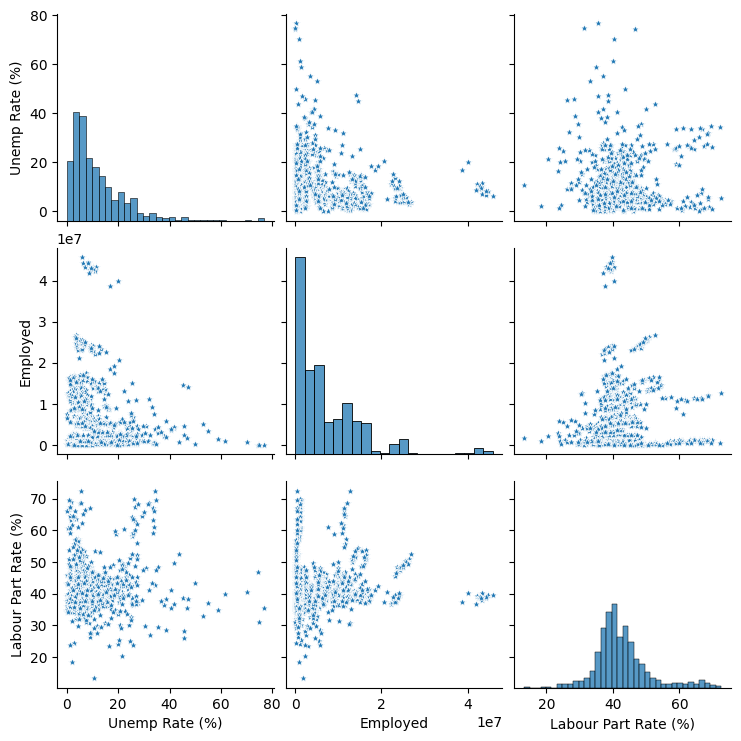

In [121]:
pair = data1[["Unemp Rate (%)", "Employed", "Labour Part Rate (%)"]]
sns.pairplot(pair, markers="*", palette="cubehelix")
plt.show()


In [122]:
data1["Area"].value_counts()
area_counts = data1["Area"].value_counts()

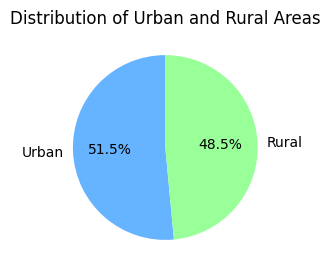

In [123]:
plt.figure(figsize=(3, 3))
area_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Urban and Rural Areas')
plt.ylabel('') 
plt.show()

### Analysis:
Summary: The pie chart shows more data from Urban areas than Rural ones. This urban bias might limit how well the findings apply to rural regions and could hide the true unemployment issues there.

# Umeployment in India (2020)

In [124]:
data2.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [164]:
data2 = data2.rename(columns={
    'Region': 'Region',
    'Date': 'Date',
    'Frequency': 'Freq',
    'Estimated Unemployment Rate (%)': 'Unemp Rate (%)',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Part Rate (%)',
    'Region.1': 'Region.1',
    'longitude': 'Long',
    'latitude': 'Lat'
})

In [126]:
data2.shape

(267, 9)

In [165]:
data2.isnull().sum()

Region                  0
Date                    0
Freq                    0
Unemp Rate (%)          0
Employed                0
Labour Part Rate (%)    0
Region.1                0
Long                    0
Lat                     0
dtype: int64

In [128]:
data2.columns = data2.columns.str.strip()

In [129]:
data2.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)        Long         Lat  
count                               267.000000  267.000000  267.000000  
mean                                 41.681573   22.826048   80.532425  
std                                   7.845419    6.270731    5.831738  
min                                  16.770000   10.850500   71.192400  
25%                                  37.265000   18.112400   76.085600  
50%                                  40.390000   23.610200   79.019300  
75%                                  44.055000   27.278400   85.279900  
max                                  69.690000   33.778200   92.937600

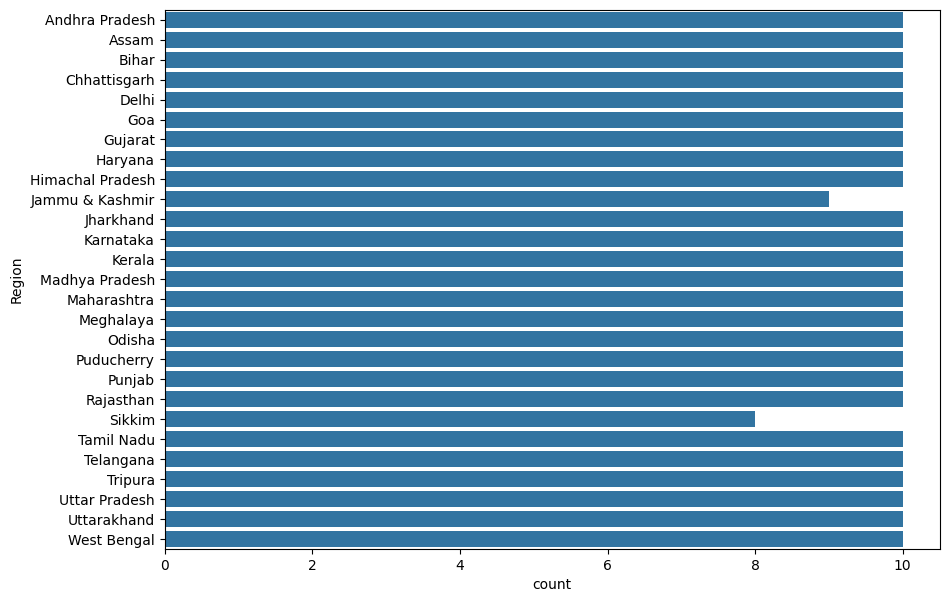

In [138]:
plt.figure(figsize=(10,7))
sns.countplot(y="Region",data=data2)
plt.show()

### Analysis:
The count plot reveals that some Indian states have more observations than others, leading to an uneven distribution. This imbalance could impact the analysis of regional unemployment patterns. It’s crucial to consider this when interpreting the results to ensure fair and accurate conclusions.

In [139]:
import plotly.express as px
fig = px.bar(data2, x="Region", y="Employed", title="Estimated Employed", 
             animation_frame='Date',template='plotly',color="Region.1")
fig.show()

### Analysis:
The bar chart shows that employment levels vary significantly across Indian states from January to October 2020, with the “North” region consistently leading. This suggests a need to investigate the reasons behind this disparity. To ensure balanced economic growth, targeted policies should be developed to boost employment in other regions while maintaining the gains in the “North.”

In [140]:
fig = px.bar(data2, x="Region", y="Unemp Rate (%)", title="Unemployment Rate 2020", 
             animation_frame='Date', template='plotly', color="Region")
fig.show()


### Analysis:
The bar chart reveals significant differences in unemployment rates across Indian states from January to October 2020. Some states consistently had higher rates, indicating a need to investigate these areas. Developing targeted policies can help address these regional unemployment imbalances effectively.

In [141]:
fig = px.bar(data2, x="Region", y="Labour Part Rate (%)", title="Labour Rate 2020", 
             animation_frame='Date', template='plotly', color="Region.1")
fig.show()


### Analysis:
The bar charts show that “Telangana,” “Assam,” “Meghalaya,” and “Tripura” have higher labor participation rates, often over 50%, while “Kerala” and “Puducherry” are below 30%. Most regions fall between 40% and 60%, highlighting significant regional differences in workforce engagement.

# Time Series Line Plot for Unemployment Rate

In [142]:
fig = px.line(data2, x='Date', y="Unemp Rate (%)", color='Region.1',
              title='Unemployment Rate Over Time', template='plotly')
fig.show()


### Analysis: 
The line plot shows that unemployment rates fluctuated over time, with notable spikes around mid-2020. The Northeast and North regions saw sharp increases, likely due to COVID-19 disruptions, while other regions remained relatively stable, highlighting different regional impacts and resilience.

# Average Unemployment Rate by Region

In [143]:
avg_unemployment = data2.groupby('Region')['Unemp Rate (%)'].mean().reset_index()

bar_plot = px.bar(avg_unemployment, x='Region', y='Unemp Rate (%)',
                  title='Average Unemployment Rate by Region', template='plotly')
bar_plot.show()


### Anaylsis:
The bar plot shows significant differences in average unemployment rates across regions. “Tripura” and “Haryana” have higher rates, suggesting more severe economic challenges, while “Assam” and “Meghalaya” have lower rates, indicating better employment conditions. This can help policymakers create targeted employment strategies for each region.

# Visualisation of Scatter Plot for Unemployment Rateand Estimated Employed

In [144]:
fig = px.scatter(data2, x='Employed', y='Unemp Rate (%)',
                 color='Region.1', title='Unemployment Rate vs. Estimated Employed', animation_frame="Date")
fig.show()


### Analysis:
The scatter plot shows that regions with more employed individuals generally have lower unemployment rates. However, there’s significant variation within regions, indicating that other factors also play a role in influencing unemployment rates. This highlights the complexity of regional unemployment patterns.

### Visualisation of Histogram for Estimated Labour Participation Rate

In [145]:
fig = px.histogram(data2, x='Labour Part Rate (%)', color='Region.1',
                   title='Distribution of Labour Participation Rate by Region', template='plotly')
fig.show()


### Analysis:
The histogram reveals that the Northeast region has the highest labor participation rates, indicating more people are actively working compared to other regions. This could be due to factors like a strong work ethic or economic necessity driving higher participation.

In [146]:
fig = px.histogram(data2, x='Employed', color='Region.1',
                   title='Distribution of Employed by Region', template='plotly')
fig.show()


### Analysis:
The histogram shows that the Northeast region has the highest proportion of employed individuals, indicating strong workforce engagement. In contrast, the South and West have more people in lower employment ranges, suggesting less active labor force participation in these regions.

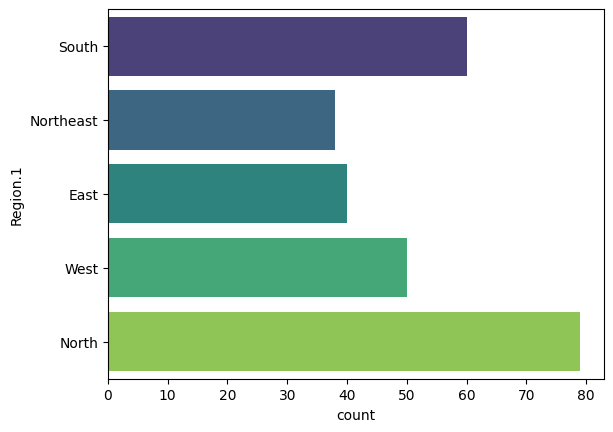

In [147]:
region_counts = data2["Region.1"].value_counts()
sns.countplot(y="Region.1", data=data2, palette="viridis")

plt.show()

### Analysis:
The bar plot shows that the North region has the most observations, followed by the South and West. The Northeast and East have fewer counts. This means the North region is the most represented in the dataset, with other regions having varying levels of representation.

In [152]:
# Group by and aggregate
avg_unemployment_over_time = data1.groupby('Date')['Unemp Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployment_over_region = data1.groupby('Region')['Unemp Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region = data1.groupby('Region')['Employed'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region = data1.groupby('Region')['Labour Part Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployment_area_wise = data1.groupby('Area')['Unemp Rate (%)'].mean().sort_values(ascending=False).reset_index()
highest_unemployment_rate_month = data1.groupby('Date')['Unemp Rate (%)'].max().sort_values(ascending=False).reset_index()

# Print all the dataframes
print("Average Unemployment Rate over time\n", avg_unemployment_over_time)
print("\nAverage Unemployment Rate over Region\n", avg_unemployment_over_region)
print("\nAverage People Employed over Region\n", avg_people_employed_over_region)
print("\nAverage Labour Participation Rate over Region\n", avg_labour_part_rate_over_region)
print("\nAverage Unemployment Rate over Area\n", avg_unemployment_area_wise)
print("\nHighest Unemployment Rate Month-wise\n", highest_unemployment_rate_month)


Average Unemployment Rate over time
            Date  Unemp Rate (%)
0    31-05-2020       24.875294
1    30-04-2020       23.641569
2    30-06-2020       11.903600
3    31-03-2020       10.700577
4    29-02-2020        9.964717
5    31-01-2020        9.950755
6    31-10-2019        9.900909
7    30-11-2019        9.868364
8    31-08-2019        9.637925
9    31-12-2019        9.497358
10   30-06-2019        9.303333
11   30-09-2019        9.051731
12   31-07-2019        9.033889
13   31-05-2019        8.874259

Average Unemployment Rate over Region
               Region  Unemp Rate (%)
0            Tripura       28.350357
1            Haryana       26.283214
2          Jharkhand       20.585000
3              Bihar       18.918214
4   Himachal Pradesh       18.540357
5              Delhi       16.495357
6    Jammu & Kashmir       16.188571
7         Chandigarh       15.991667
8          Rajasthan       14.058214
9      Uttar Pradesh       12.551429
10            Punjab       12.031071

In [171]:
fig=px.scatter_geo(data2,'Long','Lat',color='Region',
                  hover_name='Region',size='Unemp Rate (%)',
                  animation_frame='Date',scope='asia',title='Impact of lockdown on employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(
    lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True)

fig.show()

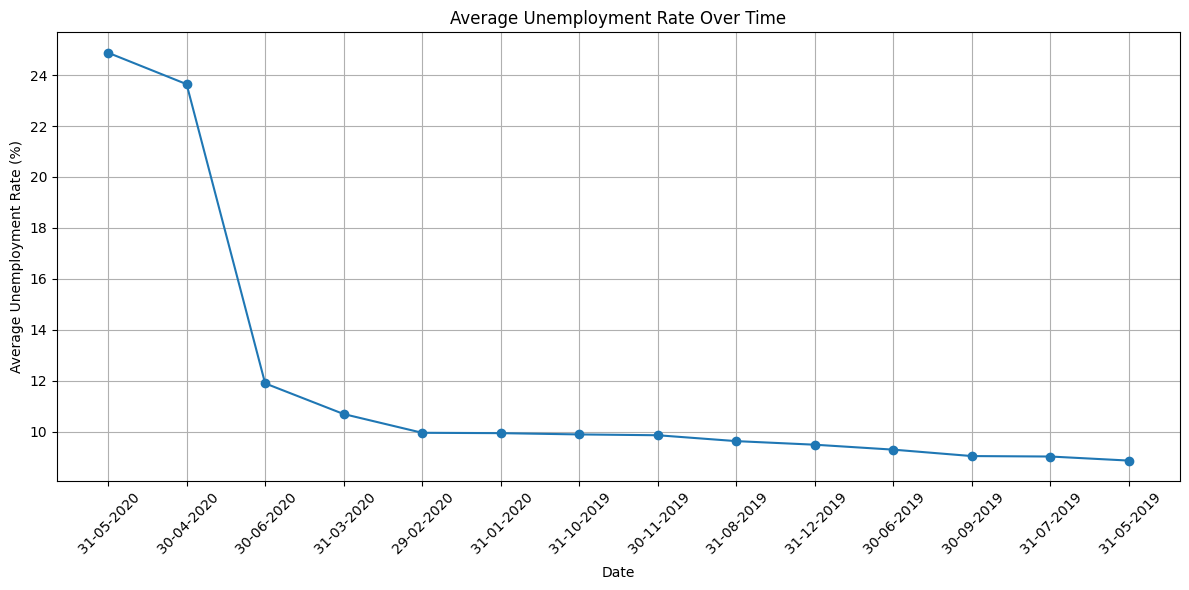

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(avg_unemployment_over_time['Date'], avg_unemployment_over_time['Unemp Rate (%)'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


## Summary of Unemployment Insights
### Time Trends:
Pandemic Impact: Unemployment rates peaked during the COVID-19 pandemic, especially in April and May 2020, with rates reaching as high as 76.74%. Post-pandemic, rates began to decrease but remained higher than pre-pandemic levels.
### Regional Disparities:
High Unemployment:  States like Tripura, Haryana, and Jharkhand experienced the highest average unemployment rates.
Low Unemployment: Meghalaya and other northeastern states had significantly lower unemployment rates.
### Employment Figures: 
High Employment: States with large populations, such as Uttar Pradesh and Maharashtra, had the highest number of employed individuals.
Low Employment: Smaller states like Sikkim reported lower employment figures.
### Labour Participation Rates:
High Participation: Tripura and Meghalaya had the highest labour participation rates.
Low Participation: States like Uttarakhand and Kerala had the lowest participation rates.
### Urban vs. Rural:
Higher Urban Unemployment: Urban areas had a higher average unemployment rate (13.17%) compared to rural areas (10.32%).
### Key Takeaways
- The pandemic had a dramatic impact on unemployment rates.
- There are significant regional differences in unemployment, with eastern and northeastern states often facing higher rates.
- Urban areas tend to have higher unemployment compared to rural areas.

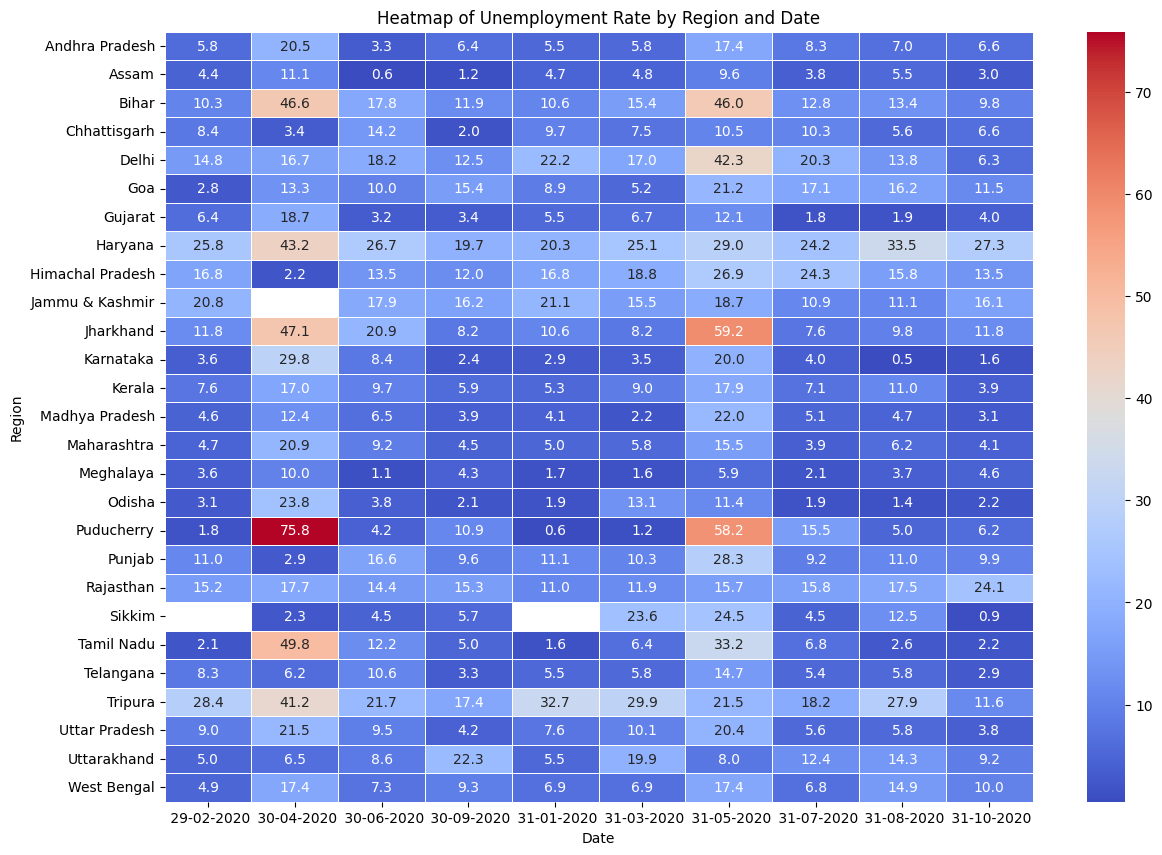

In [178]:
import seaborn as sns
heatmap_data = data2.pivot_table(index='Region', columns='Date', values='Unemp Rate (%)')
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Heatmap of Unemployment Rate by Region and Date')
plt.xlabel('Date')
plt.ylabel('Region')
plt.show()


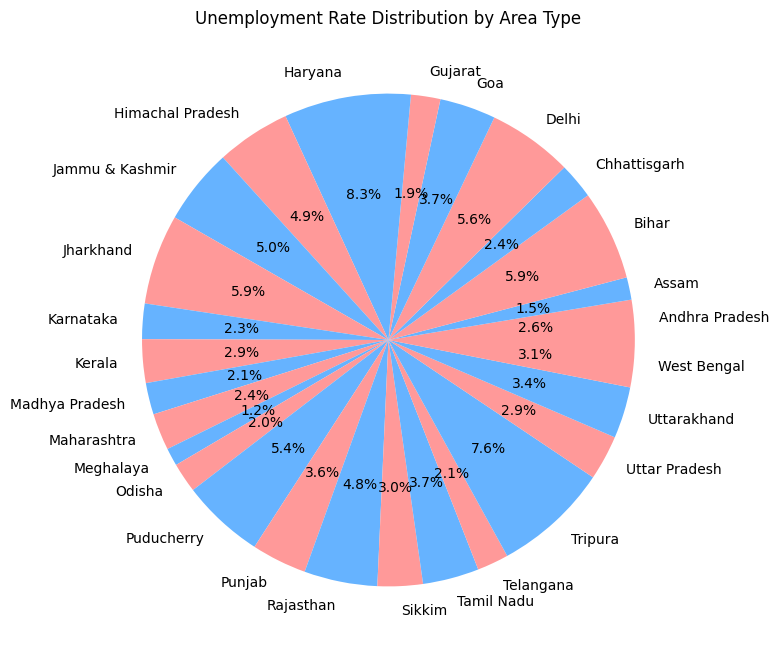

In [183]:
avg_unemployement_area_wise = data2.groupby('Region')['Unemp Rate (%)'].mean().reset_index()
area_data = avg_unemployement_area_wise.set_index('Region')['Unemp Rate (%)']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(area_data, labels=area_data.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Unemployment Rate Distribution by Area Type')
plt.show()
